# Lab Assignment 2

In the third assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning () repository on Github.

### Deadline October 26th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn has the dataset built in. The dataset contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the following cell shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


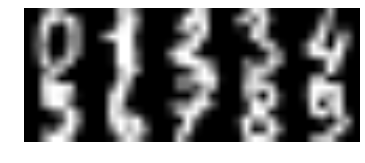

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. Also pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner.

Plot how your score on the test set improves over time. My best score was about 85% correct!

Make sure to comment your code.

In [68]:
#Make a prediction function h

# sigmoid function
def sig(input):
    for i in range(size(input)-1):
        div = 1.0 + e ** (-1.0 * input[i])
        input[i] = 1.0/div
    return input

# simply return the sigmoid applied to the hypothesis function on the vector x
def prediction_function(x,theta):
    return sig(np.dot(x, theta))




# mine = np.zeros(15)
# mine = mine + 1
# mine[0] = mine[0] + 2
# yours = np.zeros(10)
# yours = yours+2
# yours[0] = yours[0]+2

# yours = array([yours]*3)
# # mine = np.tile(mine, (10,15))

# print mine
# print yours

# # print np.multiply(yours, mine)

[ 3.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[[ 4.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 4.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 4.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]


In [63]:
#Use the output of that function to compute the cost function J:
# uneccesary in this assignment as said in class
def cost_function(x_predict,y):
#     coeff = -1.0/len(x_predict)
#     np.dot(y, np.log(y, x_predict)) + np.dot((np.subtract(1,y)), np.log(np.subtract))
#     np.sum()
    return

In [71]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):

    mult = x_predict-y
# expand the arrays to allow for a 10x1 array and a 64x1 array to become a 64x10 matrix so that it can be subtracted from the theta matrix in the main loop
# there is likely some fancy way to do this, but I thought it was simple enough (even if it's confined to hard-coded dimensionality)
#   to expand the vectors to matrix replicas
    mult = array([mult]*64)
    mult2 = array([x]*10).transpose()
    
    final = np.multiply(mult, mult2)
    print (final)
    
    return final

In [ ]:
#Choose a suitable learning rate
alpha = 1
iterations = 25
theta = np.zeros((64,10))

#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

# print shape(x)
# print x.shape[0]
# print shape(target)


for i in range(iterations):
    for j in range(x.shape[0]):
        
        x_predict = prediction_function(x[j,:],theta)
        
        y = np.zeros(10)
        y[target[j]] = 1
#         Gradient descent 
        theta = theta - alpha * compute_gradient(x_predict, y, x[j,:])
        
#         cost_function(x_predict,y)
    
# #In Andrew Ng's presentation he says that y needs to be 1 or 0.
# #You can use the following example code in the inner loop of your implementation
# y = np.zeros(10) #First create a y vector with only zeros
# y[target[j]] = 1 #Then set the right class equal to 1

[[-0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  0. ]
 [-6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  0. ]
 [-4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  0. ]
 [-0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0. ]
 [-0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  0. ]
 [-7.5  7.5  7.5  7.5  7.5  7.5  7.5  7.5  7.5  0. ]
 [-5.   5.   5.   5.   5.   5.   5.   5.   5.   0. ]
 [-7.5  7.5  7.5  7.5  7.5  7.5  7.5  7.5  7.5  0. ]
 [-2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  0. ]
 [-0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  0. ]
 [-7.5  7.5  7.5  7.5  7.5  7.5  7.5  7.5  7.5

/Users/SamCoxon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in double_scalars


[[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000  -0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000  -0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000   1.31513066e-141
    5.00000000e+000  -5.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000  -1.05165382e+021]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000   3.15631359e-141
    1.20000000e+001  -1.20000000e+001   0.00000000e+000   0.00000000e+000
    0.00000000e+000  -2.52396916e+021]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000   3.41933973e-141
    1.30000000e+001  -1.30000000e+001   0.00000000e+000   0.00000000e+000
    0.00000000e+000  -2.73429992e+021]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000   4.20841812e-141
    1.60000000e+001  -1.60000000e+001   0.00000000e+000   0.00000000e+000
    0.00000000e+000  -3.36529221e+021]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000   4.20841

/Users/SamCoxon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in multiply


[[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000               nan]
 [  0.00000000e+000   4.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   4.00000000e+000   0.00000000e+000   5.83962030e-069
    2.39207845e-304               nan]
 [  0.00000000e+000   1.30000000e+001   0.00000000e+000   0.00000000e+000
    0.00000000e+000   1.30000000e+001   0.00000000e+000   1.89787660e-068
    7.77425495e-304               nan]
 [  0.00000000e+000   1.60000000e+001   0.00000000e+000   0.00000000e+000
    0.00000000e+000   1.60000000e+001   0.00000000e+000   2.33584812e-068
    9.56831379e-304               nan]
 [  0.00000000e+000   1.60000000e+001   0.00000000e+000   0.00000000e+000
    0.00000000e+000   1.60000000e+001   0.00000000e+000   2.33584812e-068
    9.56831379e-304               nan]
 [  0.00000000e+000   1.20000000e+001   0.00000000e+000   0.00000